# Tutorial 3 - Data Collection

Nama: Arkha Sayoga Mayadi
<br>
NPM: 1606890252

Pada tutorial ini, kita akan melakukan:
1. Pengumpulan data dari Twitter menggunakan Tweepy (dengan Twitter Search API), Twint, dan Twecoll. Terdapat tiga jenis data yang akan kita kumpulkan, yaitu data <i>tweet</i>, data profil, dan data <i>network</i>.
2. Pengumpulan data dari Instagram dengan instaloader.
3. Pengumpulan data dari Linkedin dengan <i>web scraping</i>.

Sebelum memulai tutorial, kita akan menginstal <i>library</i> yang kita perlukan:

In [1]:
# !pip install tweepy
# !pip install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
# !pip install selenium
# !pip install bs4
# !pip install requests
# !pip install instaloader
# !pip install wordcloud
# !pip install Sastrawi

In [125]:
import pandas as pd
acct_twitter_1 = pd.read_csv('./auth/arkha_analytics.csv')
acct_twitter_2 = pd.read_csv('./auth/dummy_analytic.csv')
acct_instagram = pd.read_csv('./auth/instagram_arkha1998.csv')
acct_linkedin = pd.read_csv('./auth/linkedin.csv')

# Data Collection - Twitter (Tweepy)

## Twitter Search API

Pengumpulan data <i>tweet</i> dapat dilakukan dengan menggunakan Twitter API. Terdapat dua kategori API Twitter, yaitu Twitter Search API dan Twitter Streaming API. Perbedaan mendasar dari kedua jenis API tersebut adalah pada waktu data <i>tweet</i> yang akan dikumpulkan. Twitter Search API mengambil data <i>past tweet</i>, yaitu data <i>tweet</i> dengan kriteria tertentu yang diposting pada rentang waktu H-7 hari sampai dengan waktu <i>crawling</i>. Sementara itu, Twitter Streaming API akan mengambil data secara <i>real-time</i> pada saat program <i>crawling</i> dijalankan. Untuk memanggil kedua API tersebut, akan digunakan <i>library</i> Tweepy.

Langkah-langkah untuk melakukan proses <i>search tweet data</i> adalah sebagai berikut:

In [2]:
# import library
import tweepy

### Bearer token variable

Pertama-tama, kita harus mendaftarkan akun Twitter kita agar dapat menggunakan API. Mengikuti panduan untuk Twitter API v2, berikutnya kita perlu membuat sebuah proyek. Dari proyek tersebut kita dapat peroleh *bearer token*-nya. *Bearer token* tersebut wajib dimasukkan ke dalam parameter penggunaan Tweepy. 

In [3]:
bearer_token = "" # diisi

### Setting client

Pada tahap ini, kita membuat <i>client</i>  Tweepy dengan menggunakan otentikasi *bearer token*.

In [4]:
tweepy_client = tweepy.Client(bearer_token=bearer_token)

### Crawling tweet berdasarkan query 

Pada contoh <b>Code 1</b> di bawah ini, <i>tweet</i> yang ingin dicari adalah 10 <i>tweet</i> yang mengandung kata `ppkm` dan berbahasa Indonesia. Menggunakan method `search_recent_tweets()`, kita bisa mendapatkan *tweet* yang memenuhi kriteria *query* hingga 7 hari yang lalu.

Untuk mengetahui lebih lanjut soal *query search* di Twitter, bisa dibaca pada halaman ini: https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query

<b>Code 1</b>:

In [5]:
ppkm = tweepy_client.search_recent_tweets(query="ppkm lang:id", max_results=10)

print("Jumlah tweet yang berhasil didapatkan: {}.\n".format(len(ppkm.data)))

Jumlah tweet yang berhasil didapatkan: 10.



In [6]:
# objek ppkm
ppkm

Response(data=[<Tweet id=1506197053109866499 text='RT @Catatan_ali7: MOTOGP USAI\nWELCOME TO DRAMA COVID FOR RAMADHAN AND IDUL FITRI \n\nJangan kaget jika bentar lagi angka COVID naik lagi\n\nTau…'>, <Tweet id=1506196947287547908 text='RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…'>, <Tweet id=1506196926181838860 text='RT @DeeJee_007: Oyen pulang klo dijemput 😍😁\n🤭😁🙈😂\n\nTongkrongan Tempe Purwokerto\nCloud Engineer Anies Indonesia\nSenin Selasa Sarapan pagii Ep…'>, <Tweet id=1506196892622880772 text='RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…'>, <Tweet id=1506196877309480965 text='RT @JatimPemprov: Sobat Jatim,  dikutip dari Instruksi Menteri Dalam Negeri Nomor 17 Tahun 2022 yang terbit 21 Maret 2022, Alhamdulillah Ja…'>, <Tweet id=1506196856246013956 text='RT @Bebque__: Sudah selesai gelaran Mot

In [7]:
# contoh data
ppkm.data

[<Tweet id=1506197053109866499 text='RT @Catatan_ali7: MOTOGP USAI\nWELCOME TO DRAMA COVID FOR RAMADHAN AND IDUL FITRI \n\nJangan kaget jika bentar lagi angka COVID naik lagi\n\nTau…'>,
 <Tweet id=1506196947287547908 text='RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…'>,
 <Tweet id=1506196926181838860 text='RT @DeeJee_007: Oyen pulang klo dijemput 😍😁\n🤭😁🙈😂\n\nTongkrongan Tempe Purwokerto\nCloud Engineer Anies Indonesia\nSenin Selasa Sarapan pagii Ep…'>,
 <Tweet id=1506196892622880772 text='RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…'>,
 <Tweet id=1506196877309480965 text='RT @JatimPemprov: Sobat Jatim,  dikutip dari Instruksi Menteri Dalam Negeri Nomor 17 Tahun 2022 yang terbit 21 Maret 2022, Alhamdulillah Ja…'>,
 <Tweet id=1506196856246013956 text='RT @Bebque__: Sudah selesai gelaran MotoGP, seka

In [8]:
# parse ke format tabular (pandas dataframe)
import pandas as pd
pd.set_option('max_colwidth', 1000)

df_ppkm = pd.DataFrame()
for t in ppkm.data:
    df_ppkm = df_ppkm.append({
        'id': t.id,
        'text': t.text
    }, ignore_index=True)

df_ppkm

/tmp/ipykernel_75352/2074867235.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ppkm = df_ppkm.append({
/tmp/ipykernel_75352/2074867235.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ppkm = df_ppkm.append({
/tmp/ipykernel_75352/2074867235.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ppkm = df_ppkm.append({
/tmp/ipykernel_75352/2074867235.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ppkm = df_ppkm.append({
/tmp/ipykernel_75352/2074867235.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ppkm = df_ppkm.append({


,id,text
0,1506197053109866499,RT @Catatan_ali7: MOTOGP USAI\nWELCOME TO DRAMA COVID FOR RAMADHAN AND IDUL FITRI \n\nJangan kaget jika bentar lagi angka COVID naik lagi\n\nTau…
1,1506196947287547908,"RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…"
2,1506196926181838860,RT @DeeJee_007: Oyen pulang klo dijemput 😍😁\n🤭😁🙈😂\n\nTongkrongan Tempe Purwokerto\nCloud Engineer Anies Indonesia\nSenin Selasa Sarapan pagii Ep…
3,1506196892622880772,"RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…"
4,1506196877309480965,"RT @JatimPemprov: Sobat Jatim, dikutip dari Instruksi Menteri Dalam Negeri Nomor 17 Tahun 2022 yang terbit 21 Maret 2022, Alhamdulillah Ja…"
5,1506196856246013956,"RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…"
6,1506196834640822273,RT @freddyshang77: Yang mau pijat harga ppkm tapi pijat dijamin enak.silahkan ke saya dijamin gak rugi yang ada puasss BUKTIKAN sendiri #p…
7,1506196744308080644,"Lima Daerah di Jatim Masuk PPKM Level 1, Terbanyak di Jawa-Bali: Penanganan pandemi Covid-19 Jatim terus menunjukkan progres yang positif. Berdasarkan Instruksi Menteri Dalam Negeri Nomor 17 Tahun 2022 yang… https://t.co/Kt06e5Yjb8 #beritabaik #timesindonesia #ketahananinformasi"
8,1506196710728474641,"#Jogja | Sah! DIY PPKM Level 3, Ini Aturan untuk Mal - https://t.co/yaMa9YUxUm - https://t.co/3iQtHnDUkh https://t.co/UKeWceFdtz"
9,1506196694840475649,RT @DeeJee_007: Oyen pulang klo dijemput 😍😁\n🤭😁🙈😂\n\nTongkrongan Tempe Purwokerto\nCloud Engineer Anies Indonesia\nSenin Selasa Sarapan pagii Ep…


### <i>Crawling tweet</i> dari <i>username</i> spesifik

Untuk mendapatkan <i>tweet</i> dari <i>username</i> spesifik, digunakan fungsi `get_users_tweets()` dengan parameter `user_id`. Pada contoh ini akan diambil 10 <i>tweet</i> terkini dari @Univ_Indonesia. 

In [9]:
# 1. user lookup untuk mendapatkan ID
user = tweepy_client.get_user(username='univ_indonesia')
user_id = user.data.id
print("User ID untuk @univ_indonesia adalah:", user_id)

# 2. search tweet yang diposting oleh user ID tertentu
ui = tweepy_client.get_users_tweets(user_id, max_results=10)
print("Jumlah tweet dari @univ_indonesia yang berhasil didapatkan: {}.\n".format(len(ui.data)))

User ID untuk @univ_indonesia adalah: 74646907
Jumlah tweet dari @univ_indonesia yang berhasil didapatkan: 10.



In [10]:
# contoh data
ui.data

[<Tweet id=1504766249964032001 text='Mahasiswa @Medicine_UI  raih juara di AMSA Internasional dan kompetisi fisiologi internasional di University of Health and Welfare, Jepang. Simak berita baik dari UI pekan ini dan dapatkan selengkapnya di https://t.co/QQb9GCdoNl. Selamat menikmati akhir pekan. https://t.co/SnZ2GYet58'>,
 <Tweet id=1504009074592997376 text='Lokasi kampus UI terdapat di Salemba, Jakarta Pusat dan Depok, Jawa Barat. Sedangkan untuk penerimaan melalui jalur SNMPTN yang diselenggarakan LTMPT, pada tahun ini UI masuk ke wilayah DKI Jakarta dan Jawa Barat 😊 https://t.co/WFzRt5lZir'>,
 <Tweet id=1503574424888348672 text='@aprilscnd @ui Halo,\nApabila terdapat kendala pada webmail UI Anda, silakan melapor ke DSTI UI melalui email ke support@ui.ac.id dengan melampirkan Nama, NPM, Program Studi, dan permasalahannya.'>,
 <Tweet id=1502986716751474693 text='RT @ltmptofficial: H-4 PENUTUPAN REGISTRASI AKUN LTMPT UNTUK UTBK-SBMPTN 2022 \n\nHalo Calon Mahasiswa Indonesia!\n\nRegist

## Twitter Streaming API

*Tweet* yang dikumpulkan menggunakan Twitter Streaming API merupakan data <i>tweet</i> yang bersifat <i>real time</i>. Langkah-langkah melakukan pengumpulan data dengan <i>Twitter Streaming API</i> adalah sebagai berikut:

### Membuat StreamingClient

Kelas `StreamingClient` akan memberikan informasi mengenai status <i>request data</i> Twitter yang kita cari. Pada kelas ini, terdapat dua fungsi yaitu fungsi `on_tweet()` yang mengembalikan data yang kita <i>request</i> dan fungsi `on_connection_error()` yang memberikan informasi jika koneksi gagal.

Di dalam fungsi `on_tweet()`, akan didapatkan object Tweet dari Tweepy yang berisi data hasil <i>request</i>. Sementara itu, fungsi `on_connection_error()` memutus koneksi jika terdapat masalah <i>request</i>.

In [21]:
# import library
from tweepy import StreamingClient

class CustomStreamingClient(StreamingClient):
    def on_tweet(self, tweet):
        print(tweet.text)

    def on_connection_error(self):
        print("Connection error, stopping stream...")
        self.disconnect()

### Membuat stream

Kelas `CustomStreamingClient` digunakan untuk melakukan <i>request streaming</i> berdasarkan autorisasi dari token API yang kita miliki.

Untuk standar parameter *filter* yang lain dapat dilihat di halaman <a href='https://developer.twitter.com/en/docs/tweets/filter-realtime/guides/basic-stream-parameters.html'>dokumentasi</a> Twitter.

<b>Code 2</b>:

In [22]:
custom_stream = CustomStreamingClient(bearer_token)

# membuat rules untuk filter
custom_stream.add_rules(tweepy.StreamRule("ukraine"))
custom_stream.add_rules(tweepy.StreamRule("lang:en"))

custom_stream.filter()

@Mauriiice22 @Bundeskanzler Nur für Dich, Du Blindfuchs.
Eine Quelle des Wahrheitsministeriums 👇🏼

https://t.co/FzzlIagLZi
Admit Ukraine into NATO and... #care2 https://t.co/Qpr8YRcySX
The war in Ukraine is not about Sean Penn. https://t.co/N7cLgGWAyA
RT @SKYmetaverseNFT: Get Your 24k $SKY #Crypto #Metaverse #Airdrops.

RETWEET then Send Your #Polygon #Cryptocurrency Address.

Let's Moon…
RT @KyivIndependent: He added that Ukraine is waiting too long for the required weapons.

“Who is leading the Euro-Atlantic community? Is i…
@DarthPutinKGB Once again you have deserved to be called as "the master strategist". Just brilliant!
RT @ProjetFOX: 🇺🇦CYBERSEC

L'équipe ukrainienne d'intervention en cas d'urgence informatique @_CERT_UA a récemment alerté contre des attaqu…
RT @KyivIndependent: ⚡️ Zelensky: Impossible to save Mariupol without additional tanks, planes. 

“Ukraine cannot shoot down Russian missil…
RT @morphonios: Last week, Ukraine's Foreign Minister told friends that Ukraine only

KeyboardInterrupt: 

In [23]:
# objek custom stream
custom_stream

In [24]:
# cek rules yang sudah di-add
custom_stream.get_rules()

Response(data=[StreamRule(value='ukraine', tag=None, id='1506197122927915012'), StreamRule(value='saham', tag=None, id='1507937972414709761')], includes={}, errors=[], meta={'sent': '2022-03-27T04:40:26.782Z', 'result_count': 2})

In [25]:
# menghapus stream rules
custom_stream.delete_rules(ids='1505082423637266432')

Response(data=None, includes={}, errors=[{'errors': [{'parameters': {}, 'message': 'Rule does not exist'}], 'title': 'Invalid Request', 'detail': 'One or more parameters to your request was invalid.', 'type': 'https://api.twitter.com/2/problems/invalid-request'}], meta={'sent': '2022-03-27T04:40:32.839Z', 'summary': {'deleted': 0, 'not_deleted': 1}})

In [26]:
custom_stream.get_rules()

Response(data=[StreamRule(value='ukraine', tag=None, id='1506197122927915012'), StreamRule(value='saham', tag=None, id='1507937972414709761')], includes={}, errors=[], meta={'sent': '2022-03-27T04:40:36.347Z', 'result_count': 2})

## Data User - Twitter

Selain data *tweet*, data profil akun Twitter juga dapat didapatkan. Karena sebelumnya kita telah mengambil data tweet menggunakan *bearer token*, di tahap ini kita akan mencoba autentikasi user menggunakan token. Jika ingin mencoba mengambil data user dengan menggunakan *bearer token*, teman-teman bisa mengikuti sampel kode <a href="https://github.com/twitterdev/Twitter-API-v2-sample-code/blob/main/User-Lookup/get_users_with_bearer_token.py">ini</a>.  

In [ ]:
consumer_key = "" # diisi
consumer_secret = "" # diisi

<b>Code 3</b>

In [ ]:
from requests_oauthlib import OAuth1Session
# field user yg ingin diambil, referensi: https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/user
fields = "created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics,url,username,verified,withheld"
params = {"usernames": "NajwaShihab,gojektech", "user.fields": fields}
request_token_url = "https://api.twitter.com/oauth/request_token"
oauth = OAuth1Session(consumer_key, client_secret=consumer_secret)
fetch_response = oauth.fetch_request_token(request_token_url)

In [ ]:
# objek response
fetch_response

{'oauth_token': 'UoBm8AAAAAAA9wN5AAABf6LsreM',
 'oauth_token_secret': '97fyPRTnuVgChMczQ5F3ysz3L12n0YR3',
 'oauth_callback_confirmed': 'true'}

In [ ]:
resource_owner_key = fetch_response.get("oauth_token")
resource_owner_secret = fetch_response.get("oauth_token_secret")

In [ ]:
# authorisasi
base_authorization_url = "https://api.twitter.com/oauth/authorize"
authorization_url = oauth.authorization_url(base_authorization_url)
print("Please go here and authorize: %s" % authorization_url)
verifier = input("Paste the PIN here: ")

Please go here and authorize: https://api.twitter.com/oauth/authorize?oauth_token=UoBm8AAAAAAA9wN5AAABf6LsreM
Paste the PIN here: xqVDFCjA7T1UTyGzzLHencQ71fUFwjeM


In [ ]:
# Get the access token
access_token_url = "https://api.twitter.com/oauth/access_token"
oauth = OAuth1Session(
    consumer_key,
    client_secret=consumer_secret,
    resource_owner_key=resource_owner_key,
    resource_owner_secret=resource_owner_secret,
    verifier=verifier,
)
oauth_tokens = oauth.fetch_access_token(access_token_url)

access_token = oauth_tokens["oauth_token"]
access_token_secret = oauth_tokens["oauth_token_secret"]

# make the request
oauth = OAuth1Session(
    consumer_key,
    client_secret=consumer_secret,
    resource_owner_key=access_token,
    resource_owner_secret=access_token_secret,
)

In [ ]:
response = oauth.get(
    "https://api.twitter.com/2/users/by", params=params
)

if response.status_code != 200:
    raise Exception(
        "Request returned an error: {} {}".format(response.status_code, response.text)
    )

print("Response code: {}".format(response.status_code))

json_response = response.json()

Response code: 200


In [ ]:
# objek response
json_response

{'data': [{'created_at': '2008-10-22T21:15:07.000Z',
   'public_metrics': {'followers_count': 8074751,
    'following_count': 487,
    'tweet_count': 25836,
    'listed_count': 3021},
   'profile_image_url': 'https://pbs.twimg.com/profile_images/839298349148717056/yEE35xbx_normal.jpg',
   'name': 'Najwa Shihab',
   'protected': False,
   'entities': {'url': {'urls': [{'start': 0,
       'end': 23,
       'url': 'https://t.co/Yg2rg6isix',
       'expanded_url': 'http://www.narasi.tv',
       'display_url': 'narasi.tv'}]},
    'description': {'urls': [{'start': 8,
       'end': 31,
       'url': 'https://t.co/1H5VBxjbYU',
       'expanded_url': 'http://Narasi.TV',
       'display_url': 'Narasi.TV'}],
     'mentions': [{'start': 41, 'end': 50, 'username': 'narasitv'}]}},
   'location': 'ÜT: -6.292607,106.821193',
   'id': '16912985',
   'url': 'https://t.co/Yg2rg6isix',
   'verified': True,
   'description': 'Founder https://t.co/1H5VBxjbYU\nTwitter: @narasitv',
   'username': 'NajwaShiha

# Data Collection - Twitter (Twint)

Selain menggunakan Tweepy, pengumpulan data <i>tweet</i> dapat juga dilakukan dengan menggunakan <i>library</i> <a href='https://github.com/twintproject/twint'>Twint</a>. Perbedaan <i>library</i> ini dengan Tweepy adalah tidak membutuhkan <i>access token</i> Twitter API.

Berikut merupakan contoh penggunaan Twint dalam melakukan <i>crawling tweet</i>:

In [2]:
# import library
import twint
import nest_asyncio

nest_asyncio.apply()

In [5]:
# need time about 10-15 mins

c = twint.Config()
keyword = 'lebaran'
c.Search = keyword # masukkan kata kunci
c.Since = '2022-03-15 00:00:00'
c.Until = '2022-03-15 23:59:59' 
c.Store_csv = True
c.Output = '{}.csv'.format(keyword)
c.Hide_output = True

twint.run.Search(c)

CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 1.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 8.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 27.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 64.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 125.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 216.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 343.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 512.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 729.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataEx

In [4]:
# explore data 
df_goto = pd.read_csv('goto.csv')
df_goto.info()
df_goto.head()

NameError: name 'pd' is not defined

In [ ]:
# wordcloud tweet goto

# import library
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

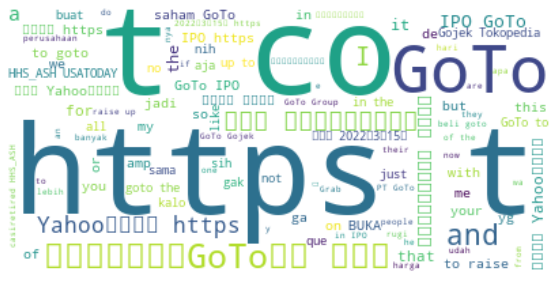

In [ ]:
text = ' '.join(df_goto['tweet'].unique().tolist())

# create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

# display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Collection - Twecoll

Pada tutorial kali ini, akan dibahas tentang langkah-langkah untuk mengetahui <i>friends-of-friends network</i>. Analisis <i>friends-of-friends</i> merupakan analisis yang dilakukan pada
jaringan media sosial yang bertujuan untuk mengetahui jaringan pertemanan. Pada tutorial
ini, akan dilakukan pengumpulan data jaringan <i>friends-of-friends</i> dari Twitter dengan
menggunakan Twecoll.

Langkah-langkah untuk untuk mengambil data pertemanan menggunakan Twecoll adalah
sebagai berikut:
1. Masuk ke direktori dari twecoll dan eksekusi perintah berikut:<br>
```
python twecoll init <USERNAME_TWITTER_TARGET>
```
Setelah selesai akan dihasilkan berkas .dat dengan format <USERNAME_TWITTER_TARGET>.dat

2. Ketika baru dijalankan pertama kali, maka program akan meminta <i>consumer secret</i> dan
<i>consumer key</i>. Masukkan <i>consumer secret</i> dan <i>consumer key</i> masing-masing.

3. Setelah terverifikasi, program akan mengarahkan ke <i>browser</i> yang berisi PIN. Berikut
adalah contoh halaman yang menampilkan PIN.
<img src='images/image2.png'></img>
Masukkan PIN yang ditampilkan di <i>browser</i> ke dalam program.

4. Setelah selesai, eksekusi perintah berikut: 
```
python twecoll fetch <USERNAME_TWITTER_TARGET>
```
Proses ini akan menghasilkan suatu berkas berekstensi .f di dalam folder fdat yang
berisi daftar <i>user id</i> pada jaringan <i>friends-of-friends</i>. Untuk mengunduh data ini,
diperlukan waktu sekitar 5-6 jam (bisa lebih lama, tergantung jumlah
<i>follower</i>/<i>following</i> target). Hal ini disebabkan oleh <i>rate limit</i> dari Twitter API yang hanya memberikan akses data sebanyak 15 <i>requests</i> per 15 menit.

5. Setelah selesai, eksekusi perintah berikut:
```
python twecoll edgelist <USERNAME_TWITTER_TARGET>
```
Perintah tersebut akan membentuk daftar <i>edge</i> dari daftar pertemanan yang sudah
disimpan dalam folder fdat. Keluaran dari perintah ini adalah berupa berkas .gml
dengan format <USERNAME_TWITTER_TARGET>.gml. Berikut adalah contoh isi berkas
.gml dari <i>username</i> target “najwashihab”
<img src='images/image4.png'></img>

Untuk dapat melihat visualisasi antar <i>nodes</i>, berkas .gml pada langkah 5 dapat dibuka dengan menggunakan <i>graph processing tools</i> seperti Gephi atau dengan Python <i>library</i>, misalnya NetworkX dan igraph. Berikut adalah cara memvisualisikan berkas .gml pada Gephi:

1. Saat membuka file .gml untuk pertama kali, akan muncul tampilan seperti ini
<img src='images/image3.png'></img>

2. Mengatur layout
Graf yang ditunjukkan tidak beraturan dan susah untuk dianalisis. Di dalam Gephi 
terdapat beberapa <i>plugins</i> yang dapat digunakan untuk merepresentasikan kembali graf 
menjadi lebih terkelompok dan membuat <i>node</i> menjadi mudah untuk dilihat. <i>Layout</i> 
dapat diakses pada <i>box</i> pada pojok kiri bawah dari layar Gephi.
<img src='images/image6.png'></img>

3. Jika Anda klik dropdown `---Choose Layout`, maka akan muncul beberapa pilihan algoritma yang dapat dipilih seperti Force Atlas, Yifan Hu, dan lain-lain. Coba Anda pilih algoritma Force Atlas lalu <i>click</i> `Run`. Setelah beberapa saat lalu klik `Stop`, maka graf akan bergerak.
<img src='images/image5.png'></img>

4. Anda dapat menginstal beberapa plugins tambahan untuk visualisasi layout dengan
masuk ke dalam <i>Tools</i> lalu <i>Plugins</i>.

<i>Disclaimer</i>: Tidak ada tugas visualisasi <i>network</i> yang diujikan pada tutorial ini, namun hal tersebut akan berguna untuk <i>midterm project</i>.

# Data Collection - Instagram

Salah satu cara untuk mengambil data dari Instagram adalah dengan menggunakan <i>library</i> Instaloader. Sebelum menggunakan <i>library</i> tersebut, kita perlu login terlebih dahulu.

In [ ]:
from instaloader import Instaloader

loader = Instaloader()
user = '' # diisi
pwd = '' # diisi
loader.login(user, pwd)

Data yang akan kita ambil dalam tutorial ini adalah data profil, postingan, komentar, dan balasan komentar.

## Data Profil - Instagram

Profil dari sebuah akun dapat dicari dengan kita mengetahui <i>username</i> atau id dari akun tersebut. Dokumentasi terkait representasi objek profil dapat diakses pada halaman <a href="https://instaloader.github.io/module/structures.html?highlight=profile#instaloader.Profile">ini</a>. 

Pada tutorial ini, kita akan mencoba mengambil data profil <a href="https://www.instagram.com/najwashihab/">Mba Nana</a>.

In [ ]:
from instaloader import Profile

profile = Profile.from_username(loader.context, 'najwashihab')
# objek profile
profile

<Profile najwashihab (48294511)>

Sebuah objek profil memiliki beberapa properti, seperti `userid`, `username`, `is_private`, dsb. Kita akan menyimpan data profil ke sebuah pandas dataframe.

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', 1000)

df_profile = pd.DataFrame({
    'userid': [profile.userid],
    'username': [profile.username],
    'is_private': [profile.is_private],
    'mediacount': [profile.mediacount],
    'igtvcount': [profile.igtvcount],
    'followers': [profile.followers],
    'followees': [profile.followees],
    'external_url': [profile.external_url],
    'is_business_account': [profile.is_business_account],
    'business_category_name': [profile.business_category_name],
    'biography': [profile.biography],
    'full_name': [profile.full_name],
    'has_public_story': [profile.has_public_story],
    'is_verified': [profile.is_verified],
    'profile_pic_url': [profile.profile_pic_url]
}) 

df_profile

,userid,username,is_private,mediacount,igtvcount,followers,followees,external_url,is_business_account,business_category_name,biography,full_name,has_public_story,is_verified,profile_pic_url
0,48294511,najwashihab,False,4151,1138,21213668,784,http://www.narasi.tv/,False,None,"Founder Narasi @narasi.tv @narasinewsroom\nWatch more on www.narasi.tv also YouTube NajwaShihab, Narasi, NarasiNewsroom.",Najwa Shihab,True,True,https://scontent-sin6-3.cdninstagram.com/v/t51.2885-19/69404594_447731939153837_7938163589615976448_n.jpg?_nc_ht=scontent-sin6-3.cdninstagram.com&_nc_cat=1&_nc_ohc=xXeCCytQFHQAX8BOGNZ&edm=AEF8tYYBAAAA&ccb=7-4&oh=00_AT90EzRXbuMxLNmekJQ_LEAIa5J1yz8N776AiEqWJw4_Xg&oe=623CDE55&_nc_sid=a9513d


## Data Postingan - Instagram

Data postingan dari sebuah akun dapat diambil dengan menjalankan fungsi `get_posts()`. Data yang dikembalikan berupa iterator. Dokumentasi terkait objek postingan dapat diakses melalui halaman <a href="https://instaloader.github.io/module/structures.html?highlight=profile#instaloader.Post">ini</a>. 

Kali ini, kita akan mengambil 5 postingan terbaru dari akun <a href="https://www.instagram.com/najwashihab/">Mba Nana</a>.

In [ ]:
posts = profile.get_posts()
# iterator posts
posts

In [ ]:
counter = 0
df_posts = pd.DataFrame()
for p in posts:
    if counter == 5:
        break
    df_posts = df_posts.append({
        'shortcode': p.shortcode,
        'mediaid': p.mediaid,
        'title': p.title,
        'owner_username': p.owner_username,
        'date_local': p.date_local,
        'date_utc': p.date_utc,
        'url': p.url,
        'typename': p.typename,
        'mediacount': p.mediacount,
        'caption': p.caption,
        'caption_hashtags': p.caption_hashtags,
        'caption_mentions': p.caption_mentions,
        'tagged_users': p.tagged_users,
        'is_video': p.is_video,
        'video_url': p.video_url,
        'video_view_count': p.video_view_count,
        'video_duration': p.video_duration,
        'likes': p.likes,
        'comments': p.comments
    }, ignore_index=True)
    counter += 1
df_posts

,shortcode,mediaid,title,owner_username,date_local,date_utc,url,typename,mediacount,caption,caption_hashtags,caption_mentions,tagged_users,is_video,video_url,video_view_count,video_duration,likes,comments
0,CbRciqgvpYR,2.797142e+18,None,najwashihab,2022-03-19 12:49:36,2022-03-19 04:49:36,https://scontent-sin6-3.cdninstagram.com/v/t51.2885-15/276009298_377839734128837_5040744026660474714_n.webp?stp=dst-jpg_e35_p1080x1080&_nc_ht=scontent-sin6-3.cdninstagram.com&_nc_cat=1&_nc_ohc=pxFkQGK0lWAAX-HsjBM&edm=AAuNW_gBAAAA&ccb=7-4&oh=00_AT8zGchFOybVqQOrNOlmzfBpghbBJlAXpq-pvzsDog-jrw&oe=623D1DD9&_nc_sid=498da5,GraphSidecar,2.0,"24 Juli 2022 nanti saya mau ajak teman2 lari. Ajakan ini terutama untuk yang belum pernah (bahkan gak pernah mikir) ikut event lari. Yang terakhir lari jaman SD waktu main kasti. Yang terlanjur mengasosiasikan lari dgn trauma hukuman.\n\nSemua di atas itu deskripsi perasaan saya tahun lalu. Tapi seperti banyak hal lain, pandemi mengubah dan membuat kita mencoba hal baru. Ada yang jadi suka tanaman, rajin sepedaan, atau yang seperti saya, lelarian. \n\nKenapa lari? Mungkin karena lari sepenuhnya mengandalkan kekuatan fisik dan pikiran. Tidak perlu alat dan ragam cara. Ketika pandemi memaksa kita kehilangan banyak pilihan, lari adalah cara saya memastikan tetap punya daya. Niat, target, rencana, eksekusi, kontrol, semua ada di tangan (dan kaki) saya.\n\nKarena lari bukan semata urusan jarak atau pace waktu. Tapi perasaan tuntas bisa menyelesaikan sesuatu. Saya gak bilang lari itu gampang dan bisa cepat lancar. Sampai sekarang saya masih jauh dari target2 yang saya idamkan.\n\nYang sa...","[pocarisweatrun2022, catatannajwa]",[],"[ridwankamil, narasi.tv, melanieputria, agusprayogo21, pocarisportid, fukazawa_wina]",0.0,None,None,NaN,94081.0,339.0
1,Ca1UkNqDigc,2.789226e+18,None,najwashihab,2022-03-08 14:41:10,2022-03-08 06:41:10,https://scontent-sin6-4.cdninstagram.com/v/t51.2885-15/275274687_4883628828424575_8915053602670584894_n.webp?stp=dst-jpg_e35&_nc_ht=scontent-sin6-4.cdninstagram.com&_nc_cat=103&_nc_ohc=3PG9zwYTFFkAX8rjueM&edm=ALQROFkBAAAA&ccb=7-4&ig_cache_key=Mjc4OTIyNTk5MzcyMTQ4OTQzNg%3D%3D.2-ccb7-4&oh=00_AT92Oi0sWzaekQNl4VQk4CYBeojUKs366gZZhddIjQAu3A&oe=623C5B74&_nc_sid=30a2ef,GraphImage,1.0,"@rahasiagadis I accept your challenge! \n\nMitos itu berkata, pelecehan hanya terjadi pada perempuan yang sedang sendiri, malam hari, di tempat sepi dan berbusana mini.\n\nFaktanya? Lokasi yang paling banyak menjadi latar terjadinya pelecehan seksual adalah jalan umum, transportasi publik, lalu sekolah dan kampus. Kasusnya terjadi paling banyak di siang hari dan jenis pakaian yang dikenakan korban sama sekali bukan faktor signifikan. \n\nSetiap perempuan rentan terhadap perlecehan seksual. Setop menyalahkan korban. Yang bersalah adalah pelaku tidak pernah korban. \n\nTiap kita pantas dan berharga.\n\nUntuk merayakan Hari Perempuan Internasional dan memberi dukungan kekuatan kepada sesama perempuan, yuk ikut posting foto kamu dengan post-it bertulisan #KamuBerharga\n\nUntuk setiap foto yang diunggah menggunakan #KamuBerhargaRG sampai 15 Maret 2022, @rahasiagadis akan menyumbangkan Rp 10,000 ke Yayasan Kemanusiaan untuk Indonesia dalam program Pundi Perempuan untuk mendukung para gad...","[kamuberharga, kamuberhargarg, kamuberhargarg, iwd2022]","[rahasiagadis, rahasiagadis, meutyahafid, widyacatlady, housniati, melanieputria]","[rahasiagadis, meutya_hafid, widyacatlady, housniati]",0.0,None,None,NaN,233117.0,846.0
2,CazgTXxDzq5,2.788715e+18,,najwashihab,2022-03-07 21:46:56,2022-03-07 13:46:56,https://scontent-sin6-2.cdninstagram.com/v/t51.2885-15/275389588_910285359637169_307903636470044915_n.jpg?stp=dst-jpg_e35&_nc_ht=scontent-sin6-2.cdninstagram.com&_nc_cat=105&_nc_ohc=pfUi-KAq8LIAX-4I_Sj&edm=AAuNW_gBAAAA&ccb=7-4&oh=00_AT9tMswZIMPl6P4UY9alhfExIygPCU98x3VyXw8rno_pyg&oe=6237E7EA&_nc_sid=498da5,GraphVideo,1.0,"Masih ingat dengan kasus pelecehan seksual di KPI? Sejak ramai di September 2021 lalu, hingga kini kasus dari korba

## Data Komentar - Instagram
Sebuah postingan dapat memiliki komentar. Data terkait komentar dapat diambil dengan menjalankan fungsi `get_comments()`. Fungsi tersebut mengembalikan objek iterator. Dokumentasi terkait objek komentar dapat diakses melalui halaman <a href="https://instaloader.github.io/module/structures.html?highlight=profile#instaloader.PostComment">ini</a>.

Kita akan mengambil 5 komentar dari postingan terbaru dari akun <a href="https://www.instagram.com/najwashihab/">Mba Nana</a>.

In [ ]:
from instaloader import Post
# mendapatkan objek postingan dengan menggunakan shortcode
post = Post.from_shortcode(loader.context, df_posts.loc[0]['shortcode'])
# objek postingan
post

<Post CbRciqgvpYR>

In [ ]:
# iterator comments
comments = post.get_comments()
comments

In [ ]:
def get_comment_answers(answers):
    res = []
    for a in answers:
        res.append({
            'created_at_utc': a.created_at_utc,
            'id': a.id,
            'likes_count': a.likes_count,
            'owner_username': a.owner.username,
            'text': a.text
        })
    return res

counter = 0
df_comments = pd.DataFrame()
for c in comments:
    if counter == 5:
        break
    df_comments = df_comments.append({
        'answers': get_comment_answers(c.answers),
        'created_at_utc': c.created_at_utc,
        'id': c.id,
        'likes_count': c.likes_count,
        'owner_username': c.owner.username,
        'text': c.text
    }, ignore_index=True)
    counter += 1
    
df_comments

,answers,created_at_utc,id,likes_count,owner_username,text
0,"[{'created_at_utc': 2022-03-19 05:06:57, 'id': 17931439886107348, 'likes_count': 2, 'owner_username': 'dianandreyan', 'text': '@melanieputria pingin banget kecanduan lari biar sehat tapi apalah daya tiktok membisiki aku untuk terus rebahan dikasur dan scroll, lepas kerja abis mandi scroll tiktok weekend juga 😓😭'}, {'created_at_utc': 2022-03-19 05:14:07, 'id': 17940069697939208, 'likes_count': 0, 'owner_username': 'apt_ratna_andriani', 'text': '@melanieputria sudah kecanduan olahraga lari..namun klo hujan ya gak lari...'}]",2022-03-19 04:58:57,1.788065e+16,15.0,melanieputria,Mba Nana aja sudah jatuh cinta sama lari. Kamu gimana?😊
1,"[{'created_at_utc': 2022-03-19 05:11:26, 'id': 17920381100160716, 'likes_count': 2, 'owner_username': 'najwashihab', 'text': '@widyacatlady HAHAHA YEKAAN'}]",2022-03-19 05:04:02,1.794587e+16,4.0,widyacatlady,MBAK NANAAAA KASTIIIIIII 🥎🎾🥎🎾 terus berangan2 kalau kasti itu lacrosse hahaha #EnidBlyton
2,[],2022-03-19 06:28:46,1.799891e+16,3.0,agusprayogo21,⚡️⚡️⚡️
3,"[{'created_at_utc': 2022-03-19 05:44:06, 'id': 17955856153655408, 'likes_count': 0, 'owner_username': 'najwashihab', 'text': '@josechitersone pasti yg bagian lari itu semacam hukuman 😂'}, {'created_at_utc': 2022-03-19 06:05:43, 'id': 17927729057174049, 'likes_count': 0, 'owner_username': 'josechitersone', 'text': '@najwashihab bener mbak huaa, soalnya pernah hampir pingsan kena hukuman lari keliling lapangan 🥲🥲'}]",2022-03-19 04:55:46,1.800699e+16,2.0,josechitersone,Paragraf pertamanya jleb mbak 😌🥲
4,"[{'created_at_utc': 2022-03-19 05:11:46, 'id': 17949438730763070, 'likes_count': 3, 'owner_username': 'najwashihab', 'text': '@alva.romance letsgoh!'}]",2022-03-19 04:59:17,1.791206e+16,0.0,alva.romance,jadi kepengen lari bareng mba Nana😂


# Data Collection - Linkedin

Salah satu cara untuk mendapatkan data dari Linkedin adalah dengan melakukan <i>scraping</i> menggunakan <i>library</i> Selenium. Jadi, sebelum memulai, teman-teman perlu mengunduh chromedriver sesuai dengan versi Chrome dan OS yang Anda gunakan. Chromedriver dapat diunduh pada halaman <a href="https://chromedriver.chromium.org/downloads">berikut</a>.

Berikut merupakan contoh kode yang digunakan untuk mengambil data profil suatu akun Linkedin. 

In [ ]:
# import library
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import os
import time

driver_path = '../../../../chromedriver_linux64/chromedriver'

In [ ]:
# functions
def scroll(height):
    driver.execute_script('window.scrollTo(0, {})'.format(height))


def get_single_element(xpath):
    WebDriverWait(driver, 3).until(
        EC.presence_of_element_located((By.XPATH, xpath)))
    return driver.find_element_by_xpath(xpath)

def fill_in(xpath, text):
    elem = get_single_element(xpath)
    elem.send_keys(text)


def get_multiple_element(xpath):
    WebDriverWait(driver, 3).until(
        EC.presence_of_all_elements_located((By.XPATH, xpath)))
    return driver.find_elements_by_xpath(xpath)


def get_text(element):
    return driver.execute_script('return arguments[0].innerText;', element)


def get_content(xpath):
    return get_text(get_single_element(xpath))


def open_driver(url):
    global driver
    driver = webdriver.Chrome(driver_path)
    driver.get(url)
    time.sleep(1)


def get_soup(url, verify=True):
    page = requests.get(url, verify=verify)
    soup = BeautifulSoup(page.content)
    return soup

In [ ]:
# login
link = 'https://www.linkedin.com/login/in?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin'
open_driver(link)
xpath = '//input[@id="username"]'
fill_in(xpath, '') # diisi
xpath = '//input[@id="password"]'
fill_in(xpath, '') # diisi
xpath = '//button[@class="btn__primary--large from__button--floating"]'
get_single_element(xpath).click()

/tmp/ipykernel_41980/1105613198.py:32: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(driver_path)
/tmp/ipykernel_41980/1105613198.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  return driver.find_element_by_xpath(xpath)


In [ ]:
link = 'https://www.linkedin.com/in/jerome-polin-sijabat-b0241247/'
driver.get(link)

In [ ]:
xpath = '//h1[@class="text-heading-xlarge inline t-24 v-align-middle break-words"]'
name = get_content(xpath)
name

/tmp/ipykernel_41980/1105613198.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  return driver.find_element_by_xpath(xpath)


'Jerome Polin Sijabat'

In [ ]:
xpath = '//div[@class="display-flex ph5 pv3"]'
try:
    about = get_content(xpath)
except:
    about = None
    print("No description")
about

No description


In [ ]:
xpath = '//div[@id="experience"]/../div[3]/ul/*'
experiences = get_multiple_element(xpath)
experiences

/tmp/ipykernel_41980/1105613198.py:19: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  return driver.find_elements_by_xpath(xpath)


[<selenium.webdriver.remote.webelement.WebElement (session="e2dcf2c57efe271a9eddffbdc84a3fd8", element="147d006f-efaa-40bb-b86d-9dbf2007e865")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e2dcf2c57efe271a9eddffbdc84a3fd8", element="ea4af5e8-a94e-451c-92d4-844611f36d3a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e2dcf2c57efe271a9eddffbdc84a3fd8", element="77994d92-c52a-4b27-88ac-a6c2ab6ab636")>]

In [ ]:
arr_exp_raw = [] 
for exp in experiences:
    arr_exp_raw.append(get_text(exp))

In [ ]:
arr_exp_raw

['Co-Founder\nCo-Founder\nMenantea · Permanent\nMenantea · Permanent\nApr 2021 - Present · 1 yr\nApr 2021 - Present · 1 yr\nJakarta, Indonesia\nJakarta, Indonesia\nMenantea, a modern fusion tea brand in Indonesia, was founded 5 people with their each expertise on FnB industry and digital marketing. 3 of which is Hendy Setiono (founder of BabaRafi Enterprise), Sylvia Surya (founder of Kopisoe), and Bisma Adi Putra (F&B Consultant Masakin Group), and the remaining 2 is manager-talent brothers: Jehian Panangian Sijabat and Jerome Polin Sijabat. With its various tea menus, like modern fruit tea, cheese cream tea, and more, Menantea wants to revolutionize how Indonesians enjoy tea beverages.\n\nWith our exclusive FnB technology, and strong digital marketing side, Menantea aspire to be one of the fastest growing tea brand, gaining 200k+ followers on instagram, and 35 store openings (10 Cities in Indonesia), in less than 1 month since its grand opening.\nMenantea, a modern fusion tea brand in

In [ ]:
driver.close()

# Tugas

1. Ubah <b>Code 1</b> dan simpan hasil <i>crawling</i> (id dan teks) menggunakan <i>code</i> tersebut dengan nama `hasil_tweet_c1.csv`. Kode tersebut diubah berdasarkan ketentuan sebagai berikut:
    * Jika Anda laki-laki dan angka-angka NPM Anda ditotalkan menjadi bilangan genap: *tweet* berbahasa Indonesia yang mengandung kata kunci `laki laki` dan tidak mengandung kata kunci `pria`  
    * Jika Anda laki-laki dan angka-angka NPM Anda ditotalkan menjadi bilangan ganjil: *tweet* berbahasa Indonesia yang mengandung kata kunci `lebaran` atau `idul fitri`
    * Jika Anda perempuan dan angka-angka NPM Anda ditotalkan menjadi bilangan genap: original *tweet* (bukan retweet) berbahasa Indonesia yang mengandung kata kunci `rusia` dan `ukraina`, namun tidak boleh ada kemunculan `nato`.
    * Jika Anda perempuan dan angka-angka NPM Anda ditotalkan menjadi bilangan ganjil: *tweet* berbahasa Indonesia dengan *hashtag* `#binomo` dan mengandung kata kunci `indra`, namun tidak boleh ada kemunculan `budi setiawan`.


2. Ubah <b>Code 2</b> dan simpan 5 <i>tweet</i> berbahasa Indonesia hasil <i>crawling</i> (id dan teks) menggunakan <i>code</i> tersebut dengan nama `hasil_tweet_c2.csv`. Kode tersebut diubah berdasarkan ketentuan sebagai berikut:
    * Jika Anda angkatan 2019: *tweet* berbahasa Indonesia yang mengandung kata kunci `minyak goreng`  
    * Jika Anda bukan angkatan 2019: *tweet* berbahasa Indonesia yang mengandung kata kunci `saham`


3. Ubah <b>Code 3</b> dan simpan data profil dalam bentuk tabular dengan nama `hasil_twitter_profile_c3.csv`. Kode tersebut diubah berdasarkan ketentuan sebagai berikut:
    * Jika Anda terakhir NPM Anda genap: akun dengan *username* @bibitid, @tulusm, dan @ibamibrahim   
    * Jika Anda bukan angkatan 2019: akun dengan *username* @marionjolamj, @gramedia, dan @mrlogix
    
    
4. Menggunakan data `goto.csv`, buat visualisasi:
    * Jika nama Anda memiliki huruf vokal berjumlah genap: top 5 akun dengan *tweet* terbanyak (x-axis nama akun, y-axis jumlah *tweet*, urutkan dari *tweet* terbanyak)
    * Jika nama Anda memiliki huruf vokal berjumlah ganjil: jumlah *tweet* per jam (x-axis jam tweet dibuat, y-axis jumlah *tweet*, urutkan berdasarkan jam terkecil, yaitu dari 00:00 sampai 23:00)
    
    
5. Ekstrak daftar:
    * Jika nama Anda terdiri dari 1-2 kata: *following* dari akun @najwashihab menggunakan instaloader 
    * Jika nama Anda terdiri dari 3 atau lebih kata: *follower* dari akun @hampersbymiya menggunakan instaloader 


6. Lakukan <i>scraping</i> profil Linkedin beberapa perusahaan bank terbesar di Indonesia sesuai dengan pembagian berikut:
<table>
<tr><th>Awalan huruf nama lengkap</th><th>URL Linkedin Perusahaan</th></tr>
<tr><td>A-E</td><td>https://www.linkedin.com/company/pt.-bank-negara-indonesia-persero-tbk./</td></tr>
<tr><td>F-Q</td><td>https://www.linkedin.com/company/bank-mandiri/</td></tr>
<tr><td>R-Z</td><td>https://www.linkedin.com/company/bank-syariah-indonesia/</td></tr>
</table>
Informasi yang perlu diambil adalah nama, <i>bio</i>, dan jumlah *followers*. Berikut merupakan contoh hasil <i>scraping</i> dari profil Linkedin BSI:

```
{
    "nama": "PT Bank Syariah Indonesia Tbk.",
    "bio": "Bersatu untuk Indonesia"
    "followers": "30381"
}
```
<i>Note:</i> Anda bisa mendapatkan nilai bonus jika berhasil mendapatkan contoh 5 akun karyawan yang bekerja di perusahaan tersebut (dalam bentuk URL, misal: https://www.linkedin.com/in/jerome-polin-sijabat-b0241247/). 

<i>Deadline</i> pengumpulan Tugas adalah Sabtu, 26 Maret 2022 pukul 08:00 di SCeLE. Berkas yang dikumpulkan adalah Tutorial 1 - Data Collection.ipynb dan seluruh berkas csv. Kumpulkan semua berkas dalam zip dengan format penamaan Tutorial1_Nama_NPM.zip.

In [1]:
npm = [1,6,0,6,8,9,0,2,5,2]
nama = 'Arkha Sayoga Mayadi'

In [136]:
import pandas as pd
acct_twitter_1 = pd.read_csv('./auth/arkha_analytics.csv')
acct_twitter_2 = pd.read_csv('./auth/dummy_analytic.csv')
acct_instagram = pd.read_csv('./auth/instagram_arkha1998.csv')
acct_linkedin = pd.read_csv('./auth/linkedin.csv')

## Soal 1
1. Ubah <b>Code 1</b> dan simpan hasil <i>crawling</i> (id dan teks) menggunakan <i>code</i> tersebut dengan nama `hasil_tweet_c1.csv`. Kode tersebut diubah berdasarkan ketentuan sebagai berikut:
    * Jika Anda laki-laki dan angka-angka NPM Anda ditotalkan menjadi bilangan genap: *tweet* berbahasa Indonesia yang mengandung kata kunci `laki laki` dan tidak mengandung kata kunci `pria`  
    * Jika Anda laki-laki dan angka-angka NPM Anda ditotalkan menjadi bilangan ganjil: *tweet* berbahasa Indonesia yang mengandung kata kunci `lebaran` atau `idul fitri`
    * Jika Anda perempuan dan angka-angka NPM Anda ditotalkan menjadi bilangan genap: original *tweet* (bukan retweet) berbahasa Indonesia yang mengandung kata kunci `rusia` dan `ukraina`, namun tidak boleh ada kemunculan `nato`.
    * Jika Anda perempuan dan angka-angka NPM Anda ditotalkan menjadi bilangan ganjil: *tweet* berbahasa Indonesia dengan *hashtag* `#binomo` dan mengandung kata kunci `indra`, namun tidak boleh ada kemunculan `budi setiawan`.

In [3]:
sum(npm) 

39

In [11]:
import pandas as pd
pd.set_option('max_colwidth', 1000)

def tweepy_to_csv(tw):
    df = pd.DataFrame()
    for t in tw.data:
        df = df.append({
            'id' : t.id,
            'text' : t.text
        }, ignore_index=True)
    return df

In [12]:
import tweepy
bearer_token = acct_twitter_1.bearer_token.values[0]
tweepy_client = tweepy.Client(bearer_token=bearer_token)

In [13]:
tw_1 = tweepy_client.search_recent_tweets(query="lebaran OR idul fitri lang:id", max_results=10)
df_1 = tweepy_to_csv(tw_1)
df_1.to_csv('hasil_tweet_c1.csv',index=False)

/tmp/ipykernel_318678/2274127875.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_318678/2274127875.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_318678/2274127875.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_318678/2274127875.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_318678/2274127875.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_318678/2274127875.py:7: Future

## Soal 2
2. Ubah <b>Code 2</b> dan simpan 5 <i>tweet</i> berbahasa Indonesia hasil <i>crawling</i> (id dan teks) menggunakan <i>code</i> tersebut dengan nama `hasil_tweet_c2.csv`. Kode tersebut diubah berdasarkan ketentuan sebagai berikut:
    * Jika Anda angkatan 2019: *tweet* berbahasa Indonesia yang mengandung kata kunci `minyak goreng`  
    * Jika Anda bukan angkatan 2019: *tweet* berbahasa Indonesia yang mengandung kata kunci `saham`

In [58]:
from tweepy import StreamingClient
import tweepy

class CustomStreamingClient(StreamingClient):
    
    def __init__(self, *args, **kwargs):
        super(CustomStreamingClient, self).__init__(*args, **kwargs)
        self.dict_id_tweet = dict()
        self.tweet_id = []
        self.tweet_text = []
    
    def on_tweet(self, tweet):
        self.tweet_id.append(tweet.id)
        self.tweet_text.append(tweet.text)
        print(tweet.id)
        print(tweet.text)
        if (len(self.tweet_id) == 5):
            self.dict_id_tweet['id'] = self.tweet_id
            self.dict_id_tweet['text'] = self.tweet_text
            self.on_connection_error()

    def on_connection_error(self):
        print("Connection error, stopping stream...")
        self.disconnect()

In [59]:
bearer_token = acct_twitter_1.bearer_token.values[0]

In [60]:
custom_stream = CustomStreamingClient(bearer_token)

# membuat rules untuk filter
custom_stream.add_rules(tweepy.StreamRule("saham"))
custom_stream.add_rules(tweepy.StreamRule("lang:id"))

Response(data=None, includes={}, errors=[{'value': 'lang:id', 'details': ['has/is/lang/sample cannot be used as a standalone operator (at position 1)'], 'title': 'UnprocessableEntity', 'type': 'https://api.twitter.com/2/problems/invalid-rules'}], meta={'sent': '2022-03-27T18:53:27.637Z', 'summary': {'created': 0, 'not_created': 1, 'valid': 0, 'invalid': 1}})

In [61]:
custom_stream.get_rules()

Response(data=[StreamRule(value='saham', tag=None, id='1507937972414709761')], includes={}, errors=[], meta={'sent': '2022-03-27T18:53:27.999Z', 'result_count': 1})

In [62]:
custom_stream.filter()

1508155638953615362
@TimpalBali Saham
1508156098758713344
Lock Up Berakhir, Begini Prediksi Nasib Saham Bukalapak (BUKA)   https://t.co/Bi0g7e9sBr https://t.co/P6ILeqdvT2
1508156636149473287
RT @saham_group: منتجاتنا تصل الى دول العالم 
دول مجلس التعاون الخليج
الشرق الاوسط 
افريقيا 
دول الاتحاد الازروبي 
امريكا 
منتجات القصدير و…
1508156735810412545
RT @saham_group: ثلاثة قرون عريقة من #يوم_بدينا ورفعنا الراية، وثلاثة عقود من يوم بدأت قصة عبد العزيز الماضي وشركة سهم, في الثلاثة القرون و…


Stream connection closed by Twitter


1508157055877660676
RT @saham_group: شركة سهم للتجارة والصناعة تمتلك اكثر من 800 منتج (صناعة سعودية )منتجات استهلاكية ذات الاستخدام الواحد منتجات بلاستيكية - ا…
Connection error, stopping stream...


In [63]:
df_2 = pd.DataFrame(custom_stream.dict_id_tweet)
df_2.to_csv('hasil_tweet_c2.csv',index=False)

## Soal 3
3. Ubah <b>Code 3</b> dan simpan data profil dalam bentuk tabular dengan nama `hasil_twitter_profile_c3.csv`. Kode tersebut diubah berdasarkan ketentuan sebagai berikut:
    * Jika Anda terakhir NPM Anda genap: akun dengan *username* @bibitid, @tulusm, dan @ibamibrahim   
    * Jika Anda bukan angkatan 2019: akun dengan *username* @marionjolamj, @gramedia, dan @mrlogix

In [7]:
npm[-1]

2

In [8]:
consumer_key = acct_twitter_1.api_key.values[0]
consumer_secret = acct_twitter_1.api_key_secret.values[0]

In [9]:
from requests_oauthlib import OAuth1Session
# field user yg ingin diambil, referensi: https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/user
fields = "created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics,url,username,verified,withheld"
params = {"usernames": "bibitid,tulusm,ibamibrahim", "user.fields": fields}
request_token_url = "https://api.twitter.com/oauth/request_token"
oauth = OAuth1Session(consumer_key, client_secret=consumer_secret)
fetch_response = oauth.fetch_request_token(request_token_url)

In [10]:
# objek response
fetch_response

{'oauth_token': 'R5n92AAAAAABadzjAAABf8aFE-0',
 'oauth_token_secret': 'vJz1X1XVpGzj5vrVOXQApl3fCd5fweJM',
 'oauth_callback_confirmed': 'true'}

In [11]:
resource_owner_key = fetch_response.get("oauth_token")
resource_owner_secret = fetch_response.get("oauth_token_secret")

In [12]:
# authorisasi
base_authorization_url = "https://api.twitter.com/oauth/authorize"
authorization_url = oauth.authorization_url(base_authorization_url)
print("Please go here and authorize: %s" % authorization_url)
verifier = input("Paste the PIN here: ")

Please go here and authorize: https://api.twitter.com/oauth/authorize?oauth_token=R5n92AAAAAABadzjAAABf8aFE-0


In [13]:
# Get the access token
access_token_url = "https://api.twitter.com/oauth/access_token"
oauth = OAuth1Session(
    consumer_key,
    client_secret=consumer_secret,
    resource_owner_key=resource_owner_key,
    resource_owner_secret=resource_owner_secret,
    verifier=verifier,
)
oauth_tokens = oauth.fetch_access_token(access_token_url)

access_token = oauth_tokens["oauth_token"]
access_token_secret = oauth_tokens["oauth_token_secret"]

# make the request
oauth = OAuth1Session(
    consumer_key,
    client_secret=consumer_secret,
    resource_owner_key=access_token,
    resource_owner_secret=access_token_secret,
)

In [14]:
response = oauth.get(
    "https://api.twitter.com/2/users/by", params=params
)

if response.status_code != 200:
    raise Exception(
        "Request returned an error: {} {}".format(response.status_code, response.text)
    )

print("Response code: {}".format(response.status_code))

json_response = response.json()

Response code: 200


In [15]:
# objek response
json_response

{'data': [{'protected': False,
   'location': 'Indonesia',
   'entities': {'url': {'urls': [{'start': 0,
       'end': 23,
       'url': 'https://t.co/4QIpKZTPjA',
       'expanded_url': 'https://linktr.ee/Bibitid',
       'display_url': 'linktr.ee/Bibitid'}]},
    'description': {'urls': [{'start': 86,
       'end': 109,
       'url': 'https://t.co/9WXjRS6jHe',
       'expanded_url': 'https://wa.me/622150864230',
       'display_url': 'wa.me/622150864230'},
      {'start': 122,
       'end': 145,
       'url': 'https://t.co/sAXId8zVNw',
       'expanded_url': 'http://t.me/Bibitid',
       'display_url': 't.me/Bibitid'}]}},
   'id': '1053475137423474689',
   'pinned_tweet_id': '1497133468320296962',
   'public_metrics': {'followers_count': 39251,
    'following_count': 13,
    'tweet_count': 4708,
    'listed_count': 87},
   'name': 'Bibit - Aplikasi Reksadana',
   'username': 'bibitid',
   'created_at': '2018-10-20T02:37:00.000Z',
   'profile_image_url': 'https://pbs.twimg.com/profile

In [18]:
import json
with open("hasil_twitter_profile_c3.json", "w") as outfile:
    json.dump(json_response, outfile)

In [20]:
df = pd.read_json (r'hasil_twitter_profile_c3.json')
df.to_csv (r'hasil_twitter_profile_c3.csv', index = None)

## Soal 4
4. Menggunakan data `goto.csv`, buat visualisasi:
    * Jika nama Anda memiliki huruf vokal berjumlah genap: top 5 akun dengan *tweet* terbanyak (x-axis nama akun, y-axis jumlah *tweet*, urutkan dari *tweet* terbanyak)
    * Jika nama Anda memiliki huruf vokal berjumlah ganjil: jumlah *tweet* per jam (x-axis jam tweet dibuat, y-axis jumlah *tweet*, urutkan berdasarkan jam terkecil, yaitu dari 00:00 sampai 23:00)

<p>Untuk kode ini goto saya terus tidak mendapatkan data sehingga saya meminta bantuan asdos untuk goto.csv-nya</p>

In [64]:
vocal_sum = 0
for v in ['a','i','u','e','o']:
    vocal_sum += nama.lower().count(v)
vocal_sum

8

In [65]:
# import library
import twint
import nest_asyncio

nest_asyncio.apply()

In [5]:
# need time about 10-15 mins

c = twint.Config()
keyword = 'goto'
c.Search = keyword # masukkan kata kunci
c.Since = '2022-03-26 00:00:00'
c.Until = '2022-03-26 23:59:59' 
c.Store_csv = True
c.Output = '{}.csv'.format(keyword)
c.Hide_output = True

twint.run.Search(c)

CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 1.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 8.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 27.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 64.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 125.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 216.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 343.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 512.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 729.0 secs


KeyboardInterrupt: 

In [66]:
# explore data 
df_goto = pd.read_csv('gotohr20.csv')
df_goto.info()
df_goto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6204 entries, 0 to 6203
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6204 non-null   int64  
 1   conversation_id  6204 non-null   int64  
 2   created_at       6204 non-null   object 
 3   date             6204 non-null   object 
 4   time             6204 non-null   object 
 5   timezone         6204 non-null   int64  
 6   user_id          6204 non-null   int64  
 7   username         6204 non-null   object 
 8   name             6204 non-null   object 
 9   place            9 non-null      object 
 10  tweet            6204 non-null   object 
 11  language         6204 non-null   object 
 12  mentions         6204 non-null   object 
 13  urls             6204 non-null   object 
 14  photos           6204 non-null   object 
 15  replies_count    6204 non-null   int64  
 16  retweets_count   6204 non-null   int64  
 17  likes_count   

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1505695671554174978,1505688959921270785,2022-03-20 23:59:57 UTC,2022-03-20,23:59:57,0,1594850538,togura33,Dashi@土木図面・数量作成屋,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'masuyama_goto', 'name': '増山建...",NaN,NaN,NaN,NaN
1,1505695516931198978,1505691957217009668,2022-03-20 23:59:20 UTC,2022-03-20,23:59:20,0,1489851603356352518,junichigoto3,Junichi Goto,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'G_Victory1', 'name': 'Gクリーム🍮...",NaN,NaN,NaN,NaN
2,1505695430738583552,1505695430738583552,2022-03-20 23:58:59 UTC,2022-03-20,23:58:59,0,152174645,akira_goto,akira_ oto💉💉💉,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1505695428343345154,1505681446471577601,2022-03-20 23:58:59 UTC,2022-03-20,23:58:59,0,1489851603356352518,junichigoto3,Junichi Goto,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'NTyin52cU6uyUQT', 'name': '東...",NaN,NaN,NaN,NaN
4,1505695389739253765,1505314984795860995,2022-03-20 23:58:50 UTC,2022-03-20,23:58:50,0,1256376750319169536,goto0502famiry,ごとう*めいちゃん☂️,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'mucchan_4K', 'name': '変態けぴけぴ...",NaN,NaN,NaN,NaN


In [67]:
# wordcloud tweet goto

# import library
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

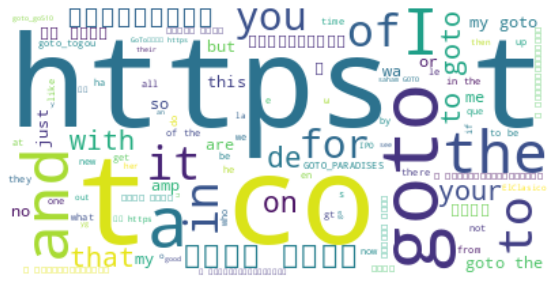

In [68]:
text = ' '.join(df_goto['tweet'].unique().tolist())

# create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

# display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [97]:
def count_tweet(df):
    user_id_count = dict()
    for i in df.index:
        user_id_count[df['user_id'][i]] = user_id_count.setdefault(df['user_id'][i],0) + 1
    df_result = {'user_id':list(user_id_count.keys()), 'counter':list(user_id_count.values())}
    df_result = pd.DataFrame.from_dict(df_result)
    return df_result

In [98]:
df_4 = count_tweet(df_goto)
df_4_sort = df_4.sort_values(by='counter', ascending=False).iloc[0:5]

<AxesSubplot:xlabel='user_id'>

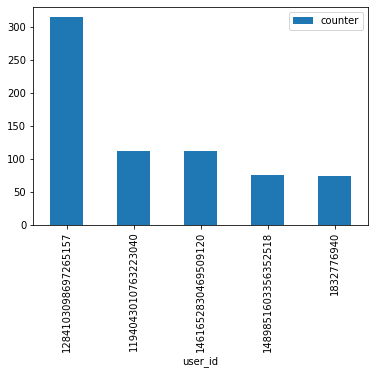

In [99]:
df_4_sort.plot.bar(x='user_id', y='counter')

## Soal 5
5. Ekstrak daftar:
    * Jika nama Anda terdiri dari 1-2 kata: *following* dari akun @najwashihab menggunakan instaloader 
    * Jika nama Anda terdiri dari 3 atau lebih kata: *follower* dari akun @hampersbymiya menggunakan instaloader 

In [100]:
from instaloader import Instaloader

loader = Instaloader()
user = acct_instagram.user.values[0]
pwd = acct_instagram.pwd.values[0]
loader.login(user, pwd)

In [101]:
from instaloader import Profile

profile = Profile.from_username(loader.context, 'hampersbymiya')
# objek profile
profile

<Profile hampersbymiya (47726860011)>

In [104]:
list_follower = []
for f in profile.get_followees():
    list_follower.append(f.username)

In [106]:
list_follower[0:5]

['sabe_kupi',
 'abigailcantika',
 'celine_evangelista',
 'sintyamarisca',
 'aurelie']

## Soal 6
6. Lakukan <i>scraping</i> profil Linkedin beberapa perusahaan bank terbesar di Indonesia sesuai dengan pembagian berikut:
<table>
<tr><th>Awalan huruf nama lengkap</th><th>URL Linkedin Perusahaan</th></tr>
<tr><td>A-E</td><td>https://www.linkedin.com/company/pt.-bank-negara-indonesia-persero-tbk./</td></tr>
<tr><td>F-Q</td><td>https://www.linkedin.com/company/bank-mandiri/</td></tr>
<tr><td>R-Z</td><td>https://www.linkedin.com/company/bank-syariah-indonesia/</td></tr>
</table>
Informasi yang perlu diambil adalah nama, <i>bio</i>, dan jumlah *followers*. Berikut merupakan contoh hasil <i>scraping</i> dari profil Linkedin BSI:

```
{
    "nama": "PT Bank Syariah Indonesia Tbk.",
    "bio": "Bersatu untuk Indonesia"
    "followers": "30381"
}
```
<i>Note:</i> Anda bisa mendapatkan nilai bonus jika berhasil mendapatkan contoh 5 akun karyawan yang bekerja di perusahaan tersebut (dalam bentuk URL, misal: https://www.linkedin.com/in/jerome-polin-sijabat-b0241247/).

In [111]:
# import library
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import os
import time

driver_path = './chromedriver'

In [112]:
# functions
def scroll(height):
    driver.execute_script('window.scrollTo(0, {})'.format(height))


def get_single_element(xpath):
    WebDriverWait(driver, 3).until(
        EC.presence_of_element_located((By.XPATH, xpath)))
    return driver.find_element_by_xpath(xpath)

def fill_in(xpath, text):
    elem = get_single_element(xpath)
    elem.send_keys(text)


def get_multiple_element(xpath):
    WebDriverWait(driver, 3).until(
        EC.presence_of_all_elements_located((By.XPATH, xpath)))
    return driver.find_elements_by_xpath(xpath)


def get_text(element):
    return driver.execute_script('return arguments[0].innerText;', element)


def get_content(xpath):
    return get_text(get_single_element(xpath))


def open_driver(url):
    global driver
    driver = webdriver.Chrome(driver_path)
    driver.get(url)
    time.sleep(1)


def get_soup(url, verify=True):
    page = requests.get(url, verify=verify)
    soup = BeautifulSoup(page.content)
    return soup

In [138]:
# login
link = 'https://www.linkedin.com/login/in?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin'
open_driver(link)
xpath = '//input[@id="username"]'
fill_in(xpath, acct_linkedin.user.values[0]) # diisi
xpath = '//input[@id="password"]'
fill_in(xpath, acct_linkedin.pwd.values[0]) # diisi
xpath = '//button[@class="btn__primary--large from__button--floating"]'
get_single_element(xpath).click()

/tmp/ipykernel_393562/1105613198.py:32: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(driver_path)
/tmp/ipykernel_393562/1105613198.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  return driver.find_element_by_xpath(xpath)


In [139]:
link = 'https://www.linkedin.com/company/pt.-bank-negara-indonesia-persero-tbk./'
driver.get(link)

In [150]:
xpath = '//span[@dir="ltr"]'
try:
    name = get_content(xpath)
except:
    name = None
    print("No name")
name

/tmp/ipykernel_393562/1105613198.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  return driver.find_element_by_xpath(xpath)


'PT. BANK NEGARA INDONESIA (Persero) Tbk.'

In [148]:
link = 'https://www.linkedin.com/company/pt.-bank-negara-indonesia-persero-tbk./about/'
driver.get(link)

In [149]:
xpath = '//section[@class="artdeco-card p5 mb4"]'
try:
    about = get_content(xpath)
except:
    about = None
    print("No description")
about

/tmp/ipykernel_393562/1105613198.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  return driver.find_element_by_xpath(xpath)


'Overview\n\nSince its establishment in 1946, BNI has always been part of the dynamics of national development in Indonesia. Now BNI has grown and developed into a solid national bank with sustainable financial performance. ‘Serving the Country, Pride of the Nation”, BNI is challenged to continue and increase its contribution for the progress of the nation and country, today and in the future.\r\n\r\nAt the end of 2012, BNI had total assets of Rp333.3 trillion and employed more than 24 thousands employees. To serve its customers, BNI leverages on its wide ranging service network, comprising 1,585 domestic outlets and 5 overseas branches in New York, London, Tokyo, Hong Kong and Singapore, 8,227 proprietary ATMs, 42,000 EDC as well as Internet banking and SMS banking facilities. BNI always strives to be the bank of choice by providing excellent service and value added solutions to all of its customers.\r\n\r\nBNI offers integrated financial services to its customers, supported by its su

In [161]:
xpath = '//div[@class="org-top-card-summary-info-list__info-item"]'
try:
    follower_of = get_multiple_element(xpath)
except:
    follower_of = None
    print("No Follower")
follower_of_text = get_text(follower_of[-1])
follower_of_text

/tmp/ipykernel_393562/1105613198.py:19: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  return driver.find_elements_by_xpath(xpath)


'229,298 followers'

In [162]:
driver.close()